In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


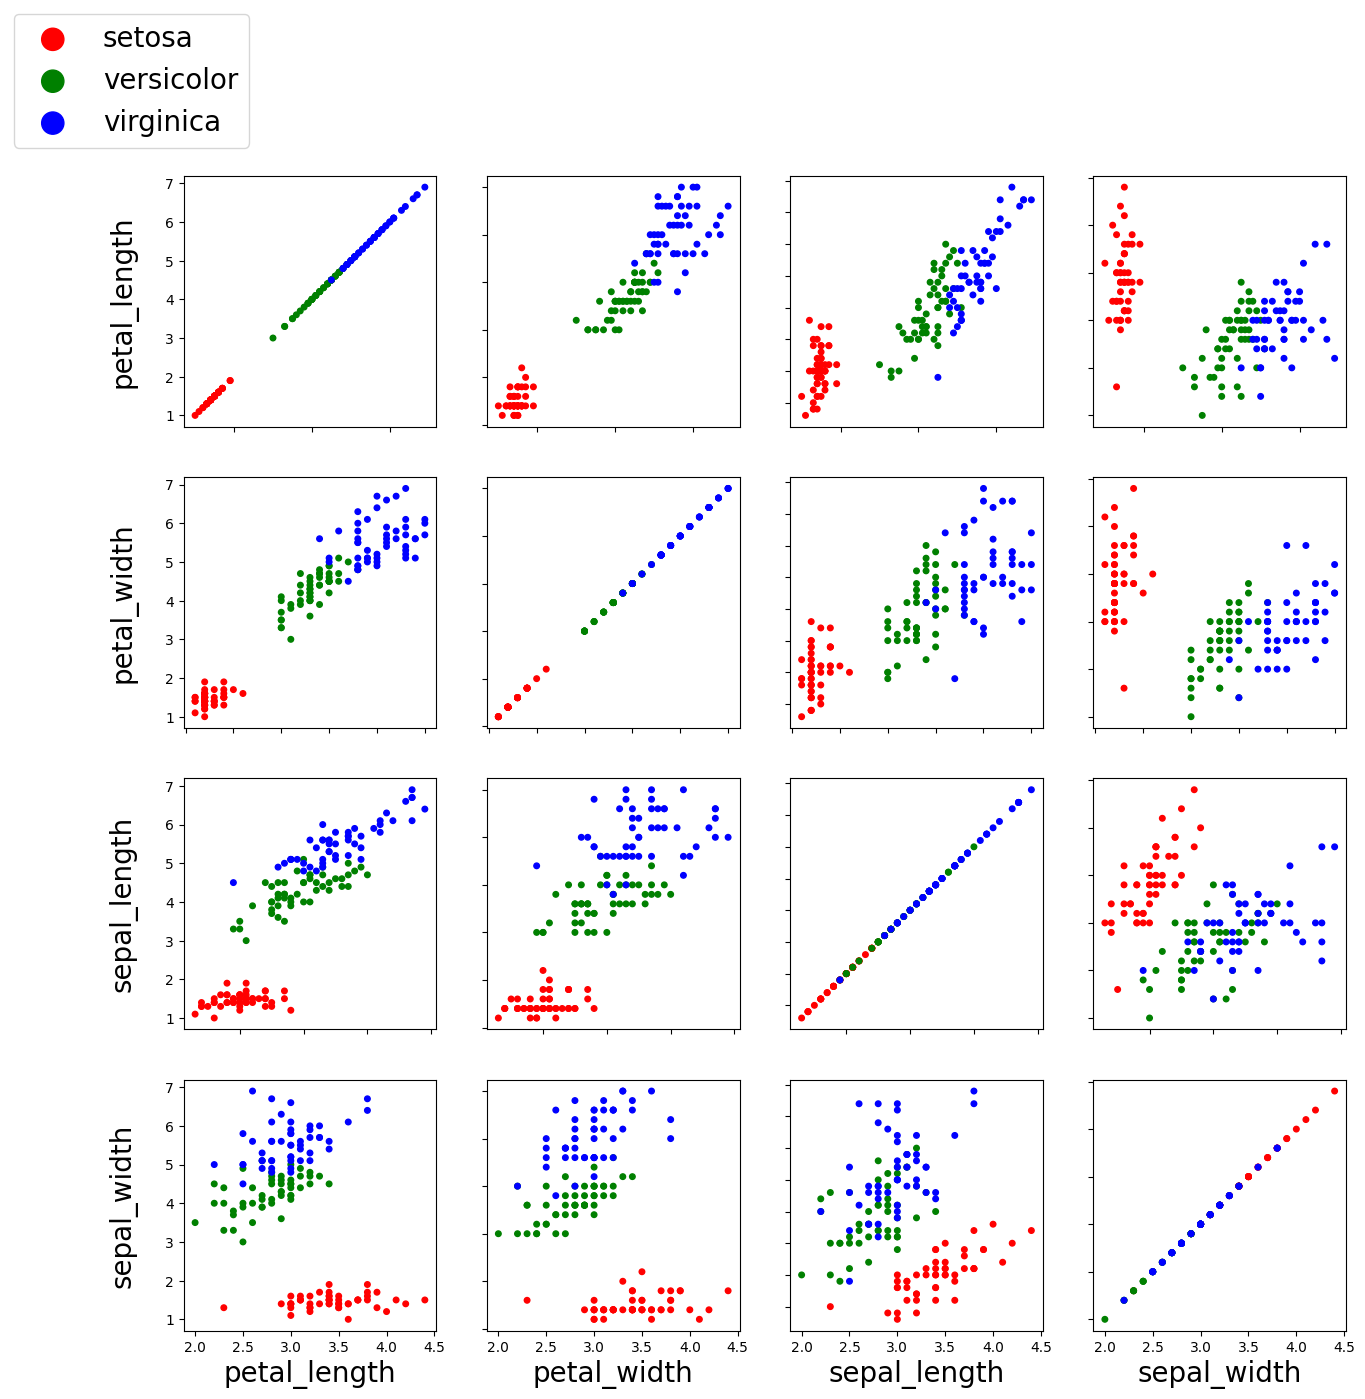

In [2]:
# Original dataset as a dataframe
iris_original = pd.read_csv('../data/iris_original.csv')

# In case we need ndarray of data
labels = iris_original['species'].to_numpy() # array of string labels
keys = iris_original.columns.values[:-1] # array of string column variable names
data = iris_original.drop('species', axis=1).to_numpy() # all data without labels (petal_length, petal_width, sepal_length, sepal_width)

# Plot data
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15,15))

values, indices, counts = np.unique(labels, return_inverse=True, return_counts=True)
colors = ['r','g','b']
for rowidx, row in enumerate(ax):
    for colidx, col in enumerate(row):
        for label, df in iris_original.groupby('species'):
            label_idx = np.where(values==label)[0][0]
            col.scatter(df.iloc[:,rowidx], df.iloc[:,colidx], c=counts[label_idx]*[colors[label_idx]], s=16, label=label)
        col.set_xlabel(iris_original.columns[colidx], fontsize=20)
        col.set_ylabel(iris_original.columns[rowidx], labelpad=20, fontsize=20)
        col.label_outer()
# for axis in ax.flat:
#     axis.set(xlabel='x-axis', ylabel='y axis')
#     axis.label_outer()
handles, lbls = plt.gca().get_legend_handles_labels()
fig.legend(handles, lbls, loc='upper left', fontsize=20, markerscale=4)
plt.show()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, shuffle=True)
x_train

array([[1.2, 0.2, 5.8, 4. ],
       [4.3, 1.3, 6.4, 2.9],
       [4.2, 1.3, 5.6, 2.7],
       [5. , 1.7, 6.7, 3. ],
       [4.5, 1.5, 5.6, 3. ],
       [5.1, 1.8, 5.9, 3. ],
       [6.9, 2.3, 7.7, 2.6],
       [5.6, 2.4, 6.3, 3.4],
       [4.7, 1.4, 6.1, 2.9],
       [1.7, 0.3, 5.7, 3.8],
       [1.5, 0.1, 4.9, 3.1],
       [3.8, 1.1, 5.5, 2.4],
       [5.7, 2.3, 6.9, 3.2],
       [5.5, 2.1, 6.8, 3. ],
       [4.5, 1.7, 4.9, 2.5],
       [5.8, 1.8, 6.7, 2.5],
       [1.6, 0.2, 4.8, 3.1],
       [1.4, 0.2, 4.9, 3. ],
       [4.7, 1.4, 7. , 3.2],
       [1.4, 0.1, 4.8, 3. ],
       [1.5, 0.4, 5.4, 3.4],
       [5.7, 2.5, 6.7, 3.3],
       [1.3, 0.2, 4.7, 3.2],
       [5.2, 2.3, 6.7, 3. ],
       [4.9, 1.8, 6.3, 2.7],
       [1.5, 0.4, 5.1, 3.7],
       [5.3, 2.3, 6.4, 3.2],
       [1.4, 0.2, 5.5, 4.2],
       [1.5, 0.2, 4.6, 3.1],
       [4.8, 1.4, 6.8, 2.8],
       [1.3, 0.2, 4.4, 3.2],
       [1.5, 0.2, 5.3, 3.7],
       [1.4, 0.2, 4.4, 2.9],
       [4.2, 1.5, 5.9, 3. ],
       [6.1, 2

In [4]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
clf.fit(x_train, y_train)
print(f'{round(clf.score(x_test, y_test), 4)*100}% accuracy on neural network')

98.33% accuracy on neural network


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [5]:
#Generating new features, adding them to dataframe (preserving original by deepcopying)

petal_area = iris_original['petal_length']*iris_original['petal_width']
sepal_area = iris_original['sepal_length']*iris_original['sepal_width']

sqrt_petal_area = np.sqrt(petal_area)
sqrt_sepal_area = np.sqrt(sepal_area)

petal_aspect_ratio = iris_original['petal_length']/iris_original['petal_width']
sepal_aspect_ratio = iris_original['sepal_length']/iris_original['sepal_width']

ps_area_ratio = petal_area/sepal_area

ps_length_ratio = iris_original['petal_length']/iris_original['sepal_length']
ps_width_ratio = iris_original['petal_width']/iris_original['sepal_width']

length_difference = iris_original['petal_length']-iris_original['sepal_length']
width_difference = iris_original['petal_width']-iris_original['sepal_width']

petal_L2 = iris_original['petal_length']*iris_original['petal_length']
petal_W2 = iris_original['petal_width']*iris_original['petal_width']
sepal_L2 = iris_original['sepal_length']*iris_original['sepal_length']
sepal_W2 = iris_original['sepal_width']*iris_original['sepal_width']

expanded_df = iris_original.copy(deep= "true")

expanded_df['petal_area'] = petal_area
expanded_df['sepal_area'] = sepal_area

expanded_df['sqrt_petal_area'] = sqrt_petal_area
expanded_df['sqrt_sepal_area'] = sqrt_sepal_area

expanded_df['petal_aspect_ratio'] = petal_aspect_ratio
expanded_df['sepal_aspect_ratio'] = sepal_aspect_ratio

expanded_df['ps_area_ratio'] = ps_area_ratio

expanded_df['ps_length_ratio'] = ps_length_ratio
expanded_df['ps_width_ratio'] = ps_width_ratio

expanded_df['length_difference'] = length_difference
expanded_df['width_difference'] = width_difference

expanded_df['petal_L2'] = petal_L2
expanded_df['petal_W2'] = petal_W2
expanded_df['sepal_L2'] = sepal_L2
expanded_df['sepal_W2'] = sepal_W2

edf_labels = expanded_df['species'].to_numpy() # array of string labels
edf_keys = expanded_df.columns.values[:-1] # array of string column variable names
edf_data = expanded_df.drop('species', axis=1).to_numpy() # all data without labels 

edf_ratios_only = expanded_df[['petal_aspect_ratio','sepal_aspect_ratio','ps_area_ratio','ps_length_ratio','ps_width_ratio','species']]
edf_2 = expanded_df[['petal_length','petal_width','sepal_length','sepal_width','sqrt_petal_area','sqrt_sepal_area','length_difference','width_difference','species']]

edf_ro_labels = edf_ratios_only['species'].to_numpy() # array of string labels
edf_ro_keys = edf_ratios_only.columns.values[:-1] # array of string column variable names
edf_ro_data = edf_ratios_only.drop('species', axis=1).to_numpy() # all data without labels 

edf_2_labels = edf_2['species'].to_numpy() # array of string labels
edf_2_keys = edf_2.columns.values[:-1] # array of string column variable names
edf_2_data = edf_2.drop('species', axis=1).to_numpy() # all data without labels 


print("whole expanded df:")
print(expanded_df)
print("subset 1:")
print(edf_ratios_only)
print("subset 2:")
print(edf_2)

whole expanded df:
     petal_length  petal_width  sepal_length  sepal_width    species  \
0             1.4          0.2           5.1          3.5     setosa   
1             1.4          0.2           4.9          3.0     setosa   
2             1.3          0.2           4.7          3.2     setosa   
3             1.5          0.2           4.6          3.1     setosa   
4             1.4          0.2           5.0          3.6     setosa   
..            ...          ...           ...          ...        ...   
145           5.2          2.3           6.7          3.0  virginica   
146           5.0          1.9           6.3          2.5  virginica   
147           5.2          2.0           6.5          3.0  virginica   
148           5.4          2.3           6.2          3.4  virginica   
149           5.1          1.8           5.9          3.0  virginica   

     petal_area  sepal_area  sqrt_petal_area  sqrt_sepal_area  \
0          0.28       17.85         0.529150       

In [6]:
#Generating PCA data
from functions import PCA
from functions import tSNE

pcaData = PCA(data)

print(pcaData)

[[ 2.81823932e+00 -5.64635060e+00 -6.59762347e-01 -3.10932338e-02]
 [ 2.78822327e+00 -5.14995237e+00 -8.42312098e-01  6.56716436e-02]
 [ 2.61337439e+00 -5.18200388e+00 -6.13947666e-01 -1.33869380e-02]
 [ 2.75702213e+00 -5.00865423e+00 -6.00288856e-01 -1.08930972e-01]
 [ 2.77364842e+00 -5.65370769e+00 -5.41768372e-01 -9.46144640e-02]
 [ 3.22150530e+00 -6.06828362e+00 -4.63169503e-01 -5.75571805e-02]
 [ 2.68182721e+00 -5.23749164e+00 -3.73955816e-01 -8.14988554e-02]
 [ 2.87621999e+00 -5.49033826e+00 -6.53727055e-01 -7.86533892e-02]
 [ 2.61598225e+00 -4.74864150e+00 -6.11088824e-01 -6.00996464e-02]
 [ 2.82960918e+00 -5.21317919e+00 -8.29480737e-01 -8.96503806e-02]
 [ 2.99541785e+00 -5.97202229e+00 -7.07165253e-01 -4.83758062e-02]
 [ 2.88960975e+00 -5.34168302e+00 -5.29697788e-01 -1.89734775e-01]
 [ 2.71625571e+00 -5.09184149e+00 -8.38692480e-01 -4.12427783e-02]
 [ 2.27856124e+00 -4.81555862e+00 -5.70548660e-01 -5.50349087e-02]
 [ 2.85761451e+00 -6.50571826e+00 -7.83474004e-01  1.25853413e

/Users/ant/Desktop/school/fall_2023/6140Project/src/functions.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


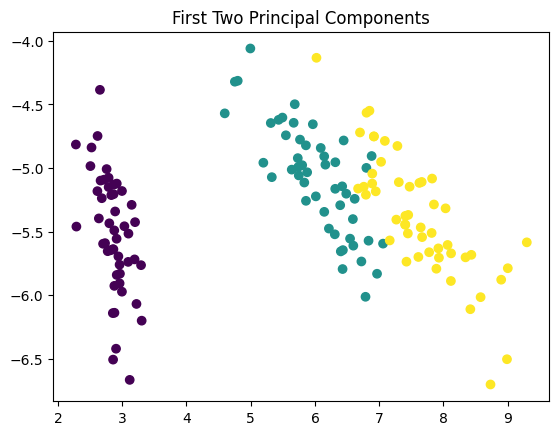

In [7]:
plt.scatter(pcaData[:,0], pcaData[:,1], c=np.unique(labels, return_inverse=True)[1])
plt.title('First Two Principal Components')
plt.show()

In [8]:
#testing neural net on PCA-generated data

pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(pcaData, labels, test_size=0.4, shuffle=True)

clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
clf2.fit(pca_x_train, pca_y_train)
print(f'{round(clf2.score(pca_x_test, pca_y_test), 4)*100}% accuracy on neural network')

95.0% accuracy on neural network


In [9]:
#testing neural net on first 3 components

pcaDat2 = pcaData[:,:3]
pca2_x_train, pca2_x_test, pca2_y_train, pca2_y_test = train_test_split(pcaDat2, labels, test_size=0.4, shuffle=True)


clf3 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
clf3.fit(pca2_x_train, pca2_y_train)
print(f'{round(clf3.score(pca2_x_test, pca2_y_test), 4)*100}% accuracy on neural network')

30.0% accuracy on neural network


In [10]:
trainind, testind = train_test_split(np.arange(150),test_size=.2,shuffle=True)
print(trainind)
print(testind)

[  0 128 131  22  57  82  88  72 110  78  46 106  40  63 147 143  17  27
  56  14  66  75  10  65 116 115  37  50 125  83  42 104  33  32  89  70
   7  20  54 146  31  13   9 119  74  47  77 149  84  76  34  73 109 103
  28  45  21  80  55 133  19  67  86 148 105 134  98   3 139  91  11 107
  85  25 111   8 124 121 102 135  30 114  90 142  61  12 100  35  93 118
  68  79  71  53  48  15 108 122 113  43 120  96 112 123  38  62 136 117
  23  59   4  29  99 138 101  92  60  16 141  58]
[ 44   6  18 144  97  39  87 130 127  64  52  24  81  69 137 132  36   2
  49  41 140   5   1  51  94  95 145 129 126  26]


In [11]:
#Major Testing Block
#need list of models (neural net, knn, logreg)
#need run_experiments function to be up and running

from functions import evaluate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model1 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
model2 = LogisticRegression(random_state=42)
model3 = KNeighborsClassifier(n_neighbors=3)

model_list = [model1, model2, model3]

n_ex = 10 #number of experiments

pcaBaseDat = PCA(data)

pcaEdfDat = PCA(edf_data)

pcaEdfRODat = PCA(edf_ro_data)

pcaEdf2Dat = PCA(edf_2_data)

pca_base_results = []
pca_edf_results = []
pca_edf_ro_results = []
pca_edf_2_results = []


for k in range(n_ex):
    trainind, testind = train_test_split(np.arange(150),test_size=.4,shuffle=True)

    for amodel in model_list:
        pca_base_results.append(evaluate(data = pcaBaseDat, labels = labels, classifier = amodel, train_indices=trainind, test_indices = testind))
        pca_edf_results.append(evaluate(data = pcaEdfDat, labels = labels, classifier = amodel, train_indices=trainind, test_indices = testind))
        pca_edf_ro_results.append(evaluate(data = pcaEdfRODat, labels = labels, classifier = amodel, train_indices=trainind, test_indices = testind))
        pca_edf_2_results.append(evaluate(data = pcaEdf2Dat, labels = labels, classifier = amodel, train_indices=trainind, test_indices = testind))
#then data vis

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [13]:
#testing neural net on raw expanded data

ex_x_train, ex_x_test, ex_y_train, ex_y_test = train_test_split(edf_data, edf_labels, test_size=0.4, shuffle=True)

clf4 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
clf4.fit(ex_x_train, ex_y_train)
print(f'{round(clf4.score(ex_x_test, ex_y_test), 4)*100}% accuracy on neural network')

#crappy result, probably overdetermined/overfitting with "more" data
#might need to be more selective, or try combining with pca...

100.0% accuracy on neural network


## Can't get much better than that. Definitely still need to look at training on train split only, because lda is supervised, but very promising.

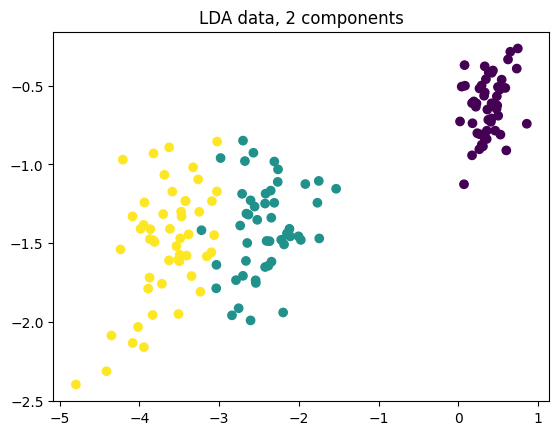

90.0% accuracy on neural network


In [14]:
from functions import LDA, evaluate, tSNE, PCA


lda_data = LDA(data, labels, 2)
plt.scatter(lda_data[:,0], lda_data[:,1],c=np.unique(labels, return_inverse=True)[1])
plt.title('LDA data, 2 components')
plt.show()


ex_x_train, ex_x_test, ex_y_train, ex_y_test = train_test_split(lda_data, labels, test_size=0.4, shuffle=True)

clf5 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
clf5.fit(ex_x_train, ex_y_train)
print(f'{round(clf5.score(ex_x_test, ex_y_test), 4)*100}% accuracy on neural network')

## Not quite as good as I was hoping, but more testing to do.

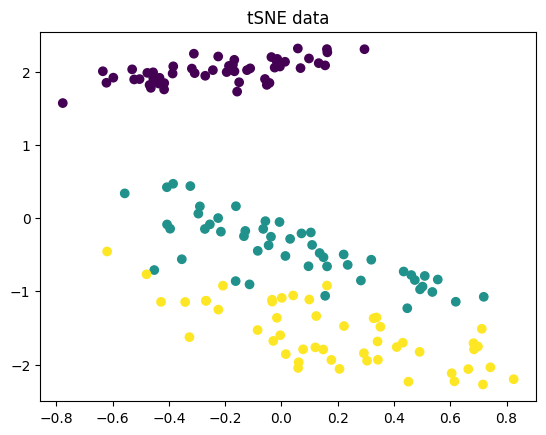

30.0% accuracy on neural network


In [15]:
tsne_data = tSNE(data, perplexity=100, epsilon=20, PCA_dims=4, output=False)
plt.scatter(tsne_data[:,0], tsne_data[:,1],c=np.unique(labels, return_inverse=True)[1])
plt.title('tSNE data')
plt.show()

ex_x_train, ex_x_test, ex_y_train, ex_y_test = train_test_split(tsne_data, labels, test_size=0.4, shuffle=True)

clf6 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
clf6.fit(ex_x_train, ex_y_train)
print(f'{round(clf6.score(ex_x_test, ex_y_test), 4)*100}% accuracy on neural network')

# Here is logistic regression on regular dataset vs LDA vs PCA vs TSNE results

In [16]:
def runAllMethods(data, clf, train_ind, test_ind, numComp=3):

    

    resBase = evaluate(data, labels, np.array(train_ind), np.array(test_ind), clf)

    lda_data = LDA(data, labels, numComp)
    resLDA = evaluate(lda_data, labels, np.array(train_ind), np.array(test_ind), clf)

    pca_data = PCA(data)
    pca_data_3 = pca_data[:,:numComp]
    resPCA = evaluate(pca_data_3, labels, np.array(train_ind), np.array(test_ind), clf)

    tsne_data = tSNE(data, perplexity=100, epsilon=20, PCA_dims=4, output=False, no_dims = numComp)
    resTSNE = evaluate(tsne_data, labels, np.array(train_ind), np.array(test_ind), clf)
    return {'Base': resBase, 'LDA': resLDA, 'PCA': resPCA, 'TSNE': resTSNE}

# One pass on each dataset/classifier/dimensionality intersection

In [30]:
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

#data and edf datas need to be defined before this is called
def runALL (printBool= False):
    res = {}
    train_ind, test_ind = train_test_split(range(len(data)))

    base = {}
    #base data
    clfLR = LogisticRegression(random_state=42, solver='liblinear')
    base['LR'] = runAllMethods(data=data, clf=clfLR, train_ind=train_ind, test_ind=test_ind, numComp=3)

    clfKNN = KNeighborsClassifier(n_neighbors=3)
    base['KNN'] = runAllMethods(data=data, clf=clfKNN, train_ind=train_ind, test_ind=test_ind, numComp=3)

    clfNN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
    base['NN'] = runAllMethods(data=data, clf=clfNN, train_ind=train_ind, test_ind=test_ind, numComp=3)

    res['Base'] = base

    edf = {}
    #whole expanded df
    clfLR = LogisticRegression(random_state=42, solver='liblinear')
    edf['LR'] = runAllMethods(data=edf_data, clf=clfLR, train_ind=train_ind, test_ind=test_ind, numComp=6)

    clfKNN = KNeighborsClassifier(n_neighbors=3)
    edf['KNN'] = runAllMethods(data=edf_data, clf=clfKNN, train_ind=train_ind, test_ind=test_ind, numComp=6)

    clfNN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
    edf['NN'] = runAllMethods(data=edf_data, clf=clfNN, train_ind=train_ind, test_ind=test_ind, numComp=6)

    res['edf'] = edf

    ro = {}
    #ratios only data
    clfLR = LogisticRegression(random_state=42, solver='liblinear')
    ro['LR'] = runAllMethods(data=edf_ro_data, clf=clfLR, train_ind=train_ind, test_ind=test_ind, numComp=3)

    clfKNN = KNeighborsClassifier(n_neighbors=3)
    ro['KNN'] = runAllMethods(data=edf_ro_data, clf=clfKNN, train_ind=train_ind, test_ind=test_ind, numComp=3)

    clfNN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
    ro['NN'] = runAllMethods(data=edf_ro_data, clf=clfNN, train_ind=train_ind, test_ind=test_ind, numComp=3)

    res['ro'] = ro

    edf2 = {}
    #extended data 2
    clfLR = LogisticRegression(random_state=42, solver='liblinear')
    edf2['LR'] = runAllMethods(data=edf_2_data, clf=clfLR, train_ind=train_ind, test_ind=test_ind, numComp=3)

    clfKNN = KNeighborsClassifier(n_neighbors=3)
    edf2['KNN'] = runAllMethods(data=edf_2_data, clf=clfKNN, train_ind=train_ind, test_ind=test_ind, numComp=3)

    clfNN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
    edf2['NN'] = runAllMethods(data=edf_2_data, clf=clfNN, train_ind=train_ind, test_ind=test_ind, numComp=3)

    res['edf2'] = edf2

    if printBool:
        for dataset, results in res.items():
            print(f'{dataset} data set:')
            for model, results2 in results.items():
                print(f'----{model} Results:')
                for dimred, results3 in results2.items():
                    print(f'--------{dimred} Dim Reduction')
                    print(results3)
    return res

all_results = runALL(True)

Base data set:
----LR Results:
--------Base Dim Reduction
{'Train_Score': 0.9642857142857143, 'Test_Score': 1.0, 'Train_Time': 0.0008051395416259766, 'Model_Size': 56}
--------LDA Dim Reduction
{'Train_Score': 0.9553571428571429, 'Test_Score': 0.9736842105263158, 'Train_Time': 0.0007207393646240234, 'Model_Size': 56}
--------PCA Dim Reduction
{'Train_Score': 0.9642857142857143, 'Test_Score': 1.0, 'Train_Time': 0.00047707557678222656, 'Model_Size': 56}
--------TSNE Dim Reduction
{'Train_Score': 0.9375, 'Test_Score': 0.9210526315789473, 'Train_Time': 0.0010988712310791016, 'Model_Size': 56}
----KNN Results:
--------Base Dim Reduction
{'Train_Score': 0.9821428571428571, 'Test_Score': 0.9210526315789473, 'Train_Time': 0.00024700164794921875, 'Model_Size': 56}
--------LDA Dim Reduction
{'Train_Score': 0.9732142857142857, 'Test_Score': 0.9473684210526315, 'Train_Time': 0.00022482872009277344, 'Model_Size': 56}
--------PCA Dim Reduction
{'Train_Score': 0.9821428571428571, 'Test_Score': 0.9210

In [33]:
from tqdm.auto import tqdm

# Perform 10 runs, to compute average and variance over
multiple_runs = []
for run in tqdm(range(10)):
    multiple_runs.append(runALL(False))

  0%|          | 0/10 [00:00<?, ?it/s]

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

In [36]:
from copy import deepcopy

# Create copy to store all results and zero out
iterated_results = deepcopy(all_results)
for dataset, results in iterated_results.items():
    for model, results2 in results.items():
        for dimred, results3 in results2.items():
            for metric, score in results3.items():
                results3[metric] = []

# Roll all the results into a list for metric creation and graphing
for run in multiple_runs:
    for dataset, results in run.items():
        for model, results2 in results.items():
            for dimred, results3 in results2.items():
                for metric, score in results3.items():
                    iterated_results[dataset][model][dimred][metric].append(score)

# Print the iterated results
for dataset, results in iterated_results.items():
    print(f'{dataset} data set:')
    for model, results2 in results.items():
        print(f'----{model} Results:')
        for dimred, results3 in results2.items():
            print(f'--------{dimred} Dim Reduction')
            print(results3)

Base data set:
----LR Results:
--------Base Dim Reduction
{'Train_Score': [0.9732142857142857, 0.9464285714285714, 0.9464285714285714, 0.9553571428571429, 0.9732142857142857, 0.9642857142857143, 0.9464285714285714, 0.9642857142857143, 0.9464285714285714, 0.9642857142857143], 'Test_Score': [0.9736842105263158, 1.0, 0.9736842105263158, 1.0, 0.9736842105263158, 0.9736842105263158, 1.0, 0.9473684210526315, 1.0, 0.9473684210526315], 'Train_Time': [0.0011382102966308594, 0.0007002353668212891, 0.0006492137908935547, 0.0007891654968261719, 0.0006861686706542969, 0.0006611347198486328, 0.0009210109710693359, 0.0006561279296875, 0.0006399154663085938, 0.00061798095703125], 'Model_Size': [56, 56, 56, 56, 56, 56, 56, 56, 56, 56]}
--------LDA Dim Reduction
{'Train_Score': [0.9553571428571429, 0.9642857142857143, 0.9285714285714286, 0.9642857142857143, 0.9375, 0.9732142857142857, 0.9464285714285714, 0.9464285714285714, 0.9642857142857143, 0.9553571428571429], 'Test_Score': [0.9473684210526315, 0.97

# Average Score Results

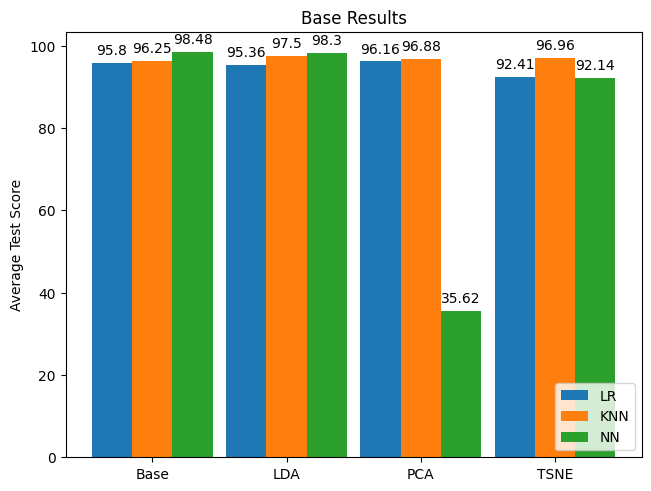

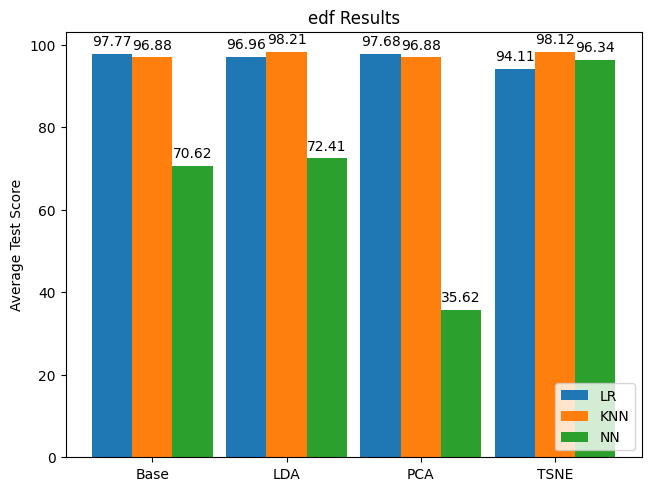

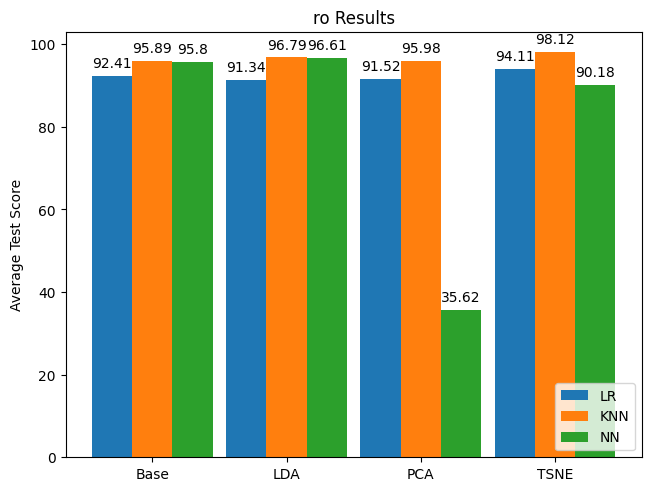

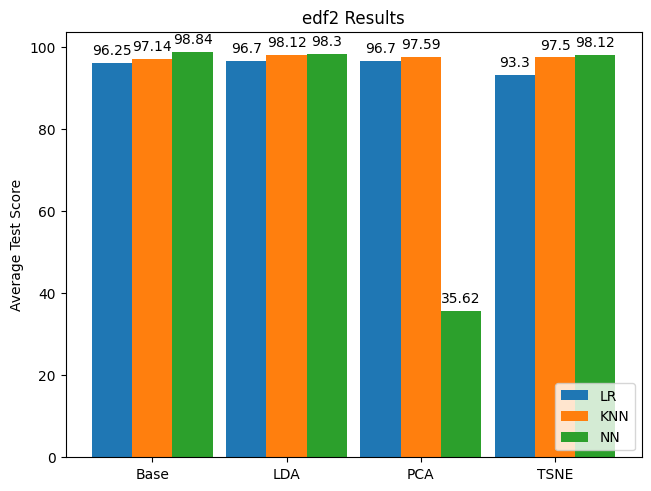

In [64]:
width = 0.3
x = np.arange(len(iterated_results['Base']['LR'].keys()))

for dataset, results in iterated_results.items():
    multiplier = 0
    fig, ax = plt.subplots(layout='constrained')

    for model, results2 in results.items():
        # for dimred, results3 in results2.items():
        offset = width*multiplier
        multiplier += 1
        rects = ax.bar(x+offset, [round(np.average(results3['Train_Score'])*100, 2) for results3 in results2.values()], width, label=model)
        ax.bar_label(rects, padding=4, label_type='edge')

    ax.set_ylabel('Average Test Score')
    ax.set_title(f'{dataset} Results')
    ax.set_xticks(x+width, [dim for dim in results2.keys()])
    ax.legend(loc='lower right')
    plt.show()


# 10 Run Variance

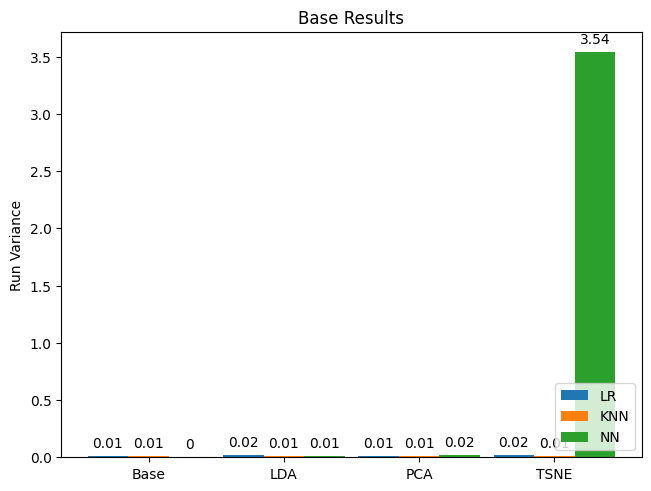

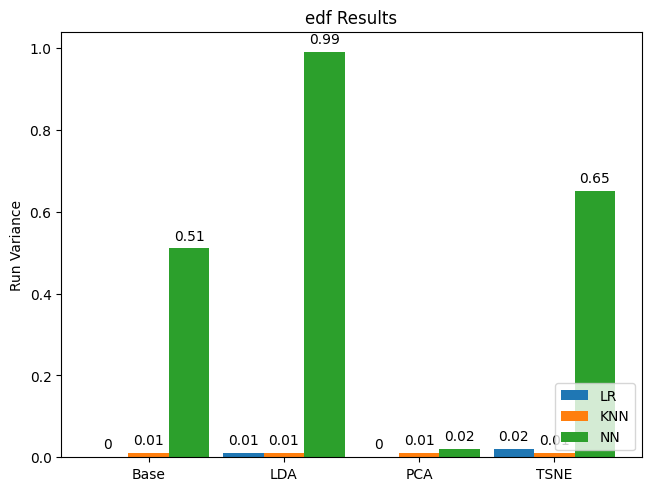

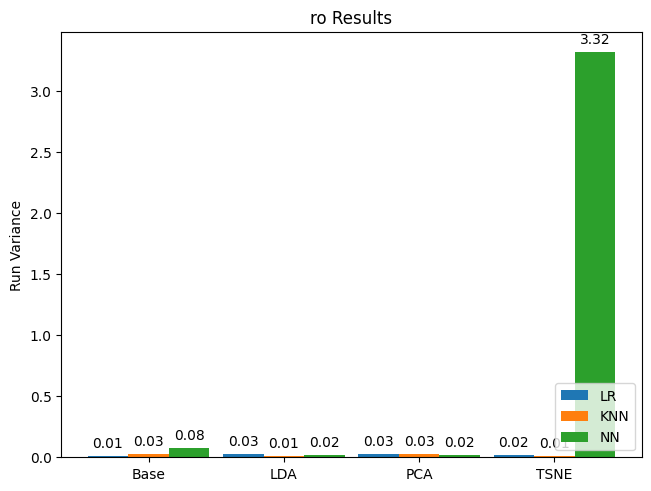

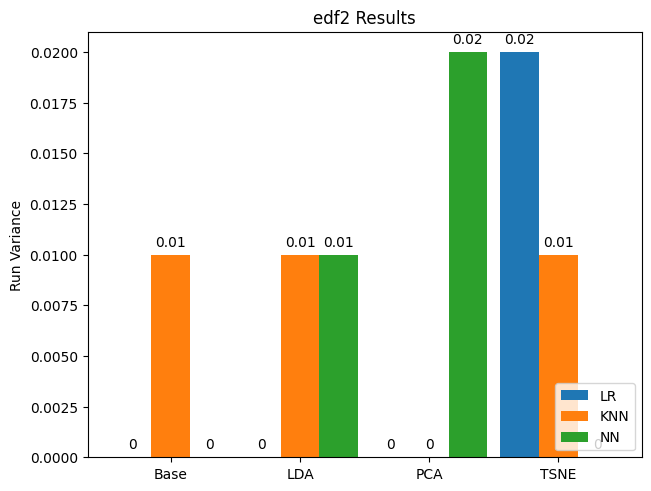

In [66]:
width = 0.3
x = np.arange(len(iterated_results['Base']['LR'].keys()))

for dataset, results in iterated_results.items():
    multiplier = 0
    fig, ax = plt.subplots(layout='constrained')

    for model, results2 in results.items():
        # for dimred, results3 in results2.items():
        offset = width*multiplier
        multiplier += 1
        rects = ax.bar(x+offset, [round(np.var(results3['Train_Score'])*100, 2) for results3 in results2.values()], width, label=model)
        ax.bar_label(rects, padding=4, label_type='edge')

    ax.set_ylabel('Run Variance')
    ax.set_title(f'{dataset} Results')
    ax.set_xticks(x+width, [dim for dim in results2.keys()])
    ax.legend(loc='lower right')
    plt.show()